In [24]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 21.4 MB/s eta 0:00:00


In [25]:
import numpy as np
import scipy.io
import os
from mne.io import read_raw_gdf
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, filtfilt

## Channel Number Verification

In [ ]:
# Read the gdf file
file_path = "/content/gdf_210_010/Subject_210_FES_Online__feedback_n_s001_r001_2025_04_03_160329.gdf"
raw_data = read_raw_gdf(file_path, preload=True)

# Get the number of channels
num_channels = len(raw_data.ch_names)
print(f"Number of channels: {num_channels}")

Extracting EDF parameters from /content/gdf_210_010/Subject_210_FES_Online__feedback_n_s001_r001_2025_04_03_160329.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 194047  =      0.000 ...   378.998 secs...
Number of channels: 68


## Utils for File Format Convert
gdf -> mat

In [28]:
def process_and_save_gdf_files(input_folder, output_folder, event_mapping):
    """
    Process all .gdf files in the specified folder and save them as .mat files.

    :param input_folder: Folder path containing .gdf files
    :param output_folder: Folder path for saving .mat files
    :param event_mapping: Mapping of event annotations
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through all .gdf files in the folder
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.gdf'):
            file_path = os.path.join(input_folder, file_name)
            raw_data = read_raw_gdf(file_path, preload=True)

            # Extract EEG data and related information
            eeg_data = raw_data.get_data()  # Channel data
            sampling_rate = raw_data.info['sfreq']  # Sampling rate
            annotations = raw_data.annotations  # Event annotations

            # Extract event annotations and map to structured data
            event_positions = []
            for annot in annotations:
                if annot['description'] in event_mapping:
                    event_positions.append({
                        'event': annot['description'],
                        'description': event_mapping[annot['description']],
                        'pos': annot['onset']
                    })

            # Prepare complete data for saving to .mat file
            mat_data = {
                'eeg_data': eeg_data,  # EEG signals
                'sampling_rate': sampling_rate,  # Sampling rate
                'event_positions': event_positions  # Event annotation information
            }

            # Save the .mat file
            output_path = os.path.join(output_folder, file_name.replace('.gdf', '.mat'))
            scipy.io.savemat(output_path, mat_data)

            print(f"Data saved to {output_path}")

# Example usage
event_mapping = {
    '32766': 'start of the recording',
    '1000': 'start of the trial',
    '768': 'start of the fixation cross',
    '769': 'cue start',
    '7691': 'rest trial start',
    '7701': 'move trial start',
    '7692': 'rest trial miss/timeout',
    '7702': 'move trial miss/timeout',
    '7693': 'rest trial hit',
    '7703': 'move trial hit'
}

## File Format Convert -- 210

In [37]:
input_folder = '/content/gdf_210_010'
output_folder = '/content/mat_210_010'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_210_010/Subject_210_FES_Online__feedback_n_s001_r004_2025_04_03_162806.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 191487  =      0.000 ...   373.998 secs...
Data saved to /content/mat_210_010/Subject_210_FES_Online__feedback_n_s001_r004_2025_04_03_162806.mat
Extracting EDF parameters from /content/gdf_210_010/Subject_210_FES_Online__feedback_n_s001_r002_2025_04_03_161216.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

In [38]:
input_folder = '/content/gdf_210_021'
output_folder = '/content/mat_210_021'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_210_021/Subject_210_FES_Online__feedback_n_s002_r001_2025_04_04_100052.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 195583  =      0.000 ...   381.998 secs...
Data saved to /content/mat_210_021/Subject_210_FES_Online__feedback_n_s002_r001_2025_04_04_100052.mat
Extracting EDF parameters from /content/gdf_210_021/Subject_210_FES_Online__feedback_n_s002_r002_2025_04_04_101132.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

In [39]:
input_folder = '/content/gdf_210_022'
output_folder = '/content/mat_210_022'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_210_022/Subject_210_FES_Online__feedback_n_s002_r006_2025_04_04_111729.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 190975  =      0.000 ...   372.998 secs...
Data saved to /content/mat_210_022/Subject_210_FES_Online__feedback_n_s002_r006_2025_04_04_111729.mat
Extracting EDF parameters from /content/gdf_210_022/Subject_210_FES_Online__feedback_n_s002_r004_2025_04_04_110250.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

## File Format Convert -- 204

In [40]:
input_folder = '/content/gdf_204_010'
output_folder = '/content/mat_204_010'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_204_010/Subject_204_FES_Online__feedback_n_s001_r002_2025_03_20_120715.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 193535  =      0.000 ...   377.998 secs...
Data saved to /content/mat_204_010/Subject_204_FES_Online__feedback_n_s001_r002_2025_03_20_120715.mat
Extracting EDF parameters from /content/gdf_204_010/Subject_204_FES_Online__feedback_n_s001_r001_2025_03_20_115753.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

In [41]:
input_folder = '/content/gdf_204_021'
output_folder = '/content/mat_204_021'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_204_021/Subject_204_FES_Online__feedback_n_s002_r003_2025_03_21_095235.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 194559  =      0.000 ...   379.998 secs...
Data saved to /content/mat_204_021/Subject_204_FES_Online__feedback_n_s002_r003_2025_03_21_095235.mat
Extracting EDF parameters from /content/gdf_204_021/Subject_204_FES_Online__feedback_n_s002_r001_2025_03_21_093700.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

In [42]:
input_folder = '/content/gdf_204_022'
output_folder = '/content/mat_204_022'

process_and_save_gdf_files(input_folder, output_folder, event_mapping)

Extracting EDF parameters from /content/gdf_204_022/Subject_204_FES_Online__feedback_n_s002_r006_2025_03_21_110548.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, C3, CZ, C4, T8, M2, CP5, CP1, CP2, CP6, P7, P3, PZ, P4, P8, POZ, O1, O2, EOG, AF7, AF3, AF4, AF8, F5, F1, F2, F6, FC3, FCZ, FC4, C5, C1, C2, C6, CP3, CP4, P5, P1, P2, P6, PO5, PO3, PO4, PO6, FT7, FT8, TP7, TP8, PO7, PO8, OZ, sens1, sens2, sens3
Creating raw.info structure...
Reading 0 ... 195071  =      0.000 ...   380.998 secs...
Data saved to /content/mat_204_022/Subject_204_FES_Online__feedback_n_s002_r006_2025_03_21_110548.mat
Extracting EDF parameters from /content/gdf_204_022/Subject_204_FES_Online__feedback_n_s002_r005_2025_03_21_105838.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will

## Utils for EEG Data Filtering

In [20]:
# Filter and preprocess the EEG data
lowcut = 0.5  # Low-frequency boundary (Hz)
highcut = 45  # High-frequency boundary (Hz)
amp_limit = 100 * 1e-6  # Amplitude limit (-100 μV to 100 μV)

# Define the frequency range filter
def bandpass_filter(data, lowcut, highcut, sampling_rate):
    nyquist = 0.5 * sampling_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    return filtfilt(b, a, data, axis=-1)

def preprocess_eeg_data(eeg_data, lowcut, highcut, sampling_rate, amp_limit):
    # Apply bandpass filtering to the data
    eeg_filtered = bandpass_filter(eeg_data, lowcut, highcut, sampling_rate)

    # Limit the amplitude range
    eeg_clipped = np.clip(eeg_filtered, -amp_limit, amp_limit)

    # Find all channels where the data is entirely zero and their indices
    zero_channels = np.where(np.all(eeg_clipped == 0, axis=1))[0]  # Find indices of channels entirely zero
    print(f"Number of channels entirely zero: {len(zero_channels)}")
    print(f"Indices of channels entirely zero: {zero_channels}")
    return eeg_clipped

## Utils for Final Grand Average
i choose to ignore the abnormal data here for the total number is only 3 trial

if that's not appropriate you can edit in this section


```
if end_sample - start_sample < 3000:
    break
```

and if the channel number is 67 you can use


```
eeg_data = mat_data['eeg_data'][:67]
# if the channel number is 67 you can use this instead
```

ps: i gusse you need the actual grand average data so i didn't run the 67 channel graph, sorry if i was wrong


In [ ]:
# Compute and plot grand average
def compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, title):
    all_rest_segments = []
    all_move_segments = []

    # Iterate through .mat files in the folder
    for file_name in os.listdir(mat_folder):
        if file_name.endswith('.mat'):
            file_path = os.path.join(mat_folder, file_name)
            mat_data = scipy.io.loadmat(file_path)

            # Extract EEG data and event information
            eeg_data = mat_data['eeg_data']

            # eeg_data = mat_data['eeg_data'][:67]
            # if the channel number is 67 you can use this instead

            sampling_rate = mat_data['sampling_rate'][0][0]
            event_positions = mat_data['event_positions'][0]

            # Preprocess EEG data
            eeg_data_filtered = preprocess_eeg_data(eeg_data, lowcut, highcut, sampling_rate, amp_limit)

            # Extract rest and move EEG segments
            for start_event in event_positions:
                start_sample = int(start_event['pos'][0][0] * sampling_rate)
                if start_event['event'][0] in rest_starts:
                    for end_event in event_positions:
                        if end_event['event'][0] in rest_ends and end_event['pos'][0][0] > start_event['pos'][0][0]:
                            end_sample = int(end_event['pos'][0][0] * sampling_rate)
                            if end_sample - start_sample < 3000:
                              break
                              # ignore the abnormal data

                            segment = np.mean(eeg_data_filtered[:, start_sample:end_sample], axis=0)
                            all_rest_segments.append(segment)
                            break
                elif start_event['event'][0] in move_starts:
                    for end_event in event_positions:
                        if end_event['event'][0] in move_ends and end_event['pos'][0][0] > start_event['pos'][0][0]:
                            end_sample = int(end_event['pos'][0][0] * sampling_rate)
                            if end_sample - start_sample < 3000:
                              continue
                            segment = np.mean(eeg_data_filtered[:, start_sample:end_sample], axis=0)
                            all_move_segments.append(segment)
                            break

    # Compute and plot grand average
    def plot_segments(segments, title, color):
        if segments:
            min_length = min(seg.shape[0] for seg in segments)
            truncated_segments = [seg[:min_length] for seg in segments]
            grand_average = np.mean(truncated_segments, axis=0)

            plt.figure(figsize=(12, 6))
            plt.plot(np.arange(len(grand_average)) / sampling_rate, grand_average, label=title, color=color)
            plt.title(f"{title} Grand Average EEG")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            plt.legend(loc='upper right')
            plt.grid()
            plt.show()
        else:
            print(f"No segments found for {title}.")

    # Plot grand average for Rest and Move
    plot_segments(all_rest_segments, title + ": Rest", 'blue')
    plot_segments(all_move_segments, title + ": Move", 'orange')

    # return all_rest_segments, all_move_segments

# Parameter settings
lowcut = 0.5  # Low-frequency boundary (Hz)
highcut = 45  # High-frequency boundary (Hz)
amp_limit = 100 * 1e-6  # Amplitude limit (-100 μV to 100 μV)
rest_starts = ['7691']
move_starts = ['7701']
rest_ends = ['7692', '7693']
move_ends = ['7702', '7703']


## Grand Average -- 210

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-89-1dfcd6ddf427>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-89-1dfcd6ddf427>:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-89-1dfcd6ddf427>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


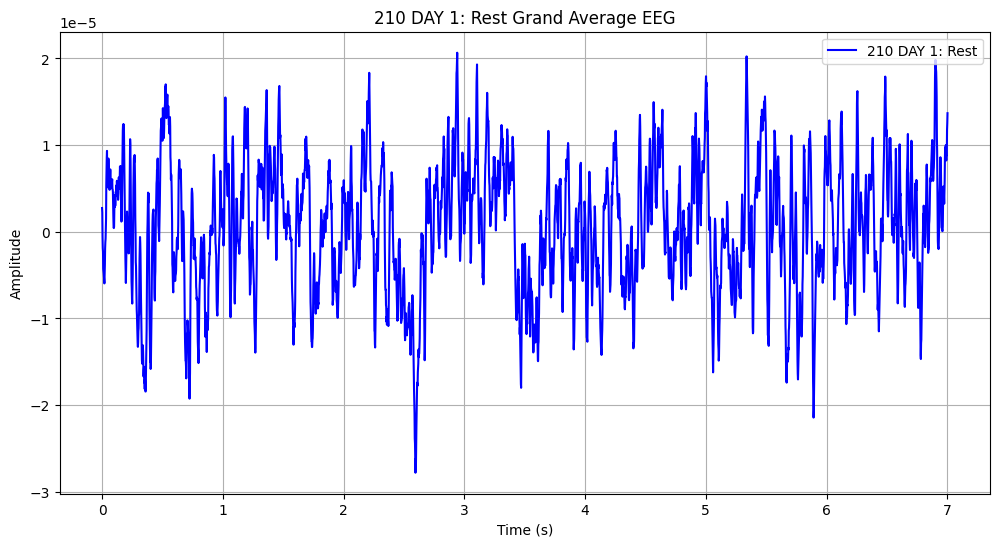

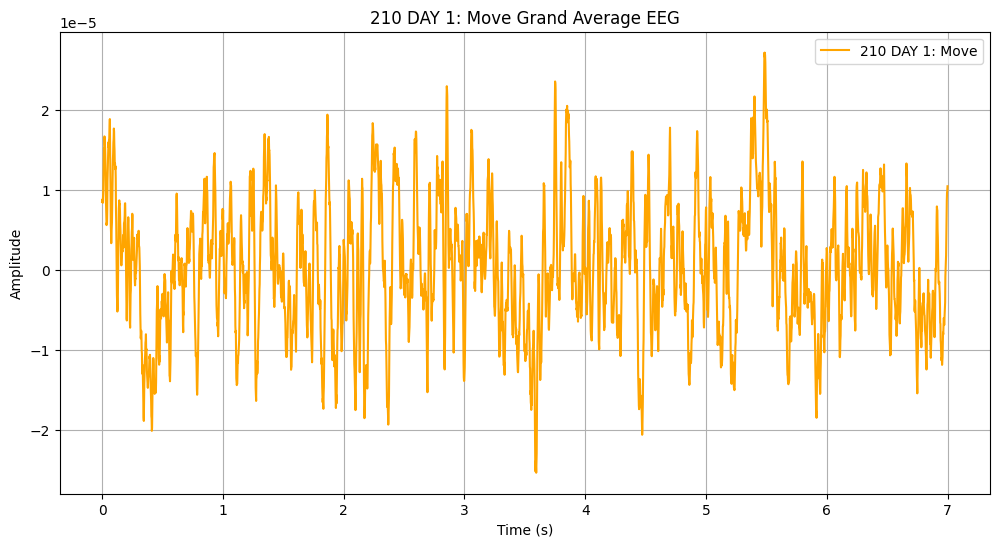

In [ ]:
mat_folder = '/content/mat_210_010'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '210 DAY 1')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


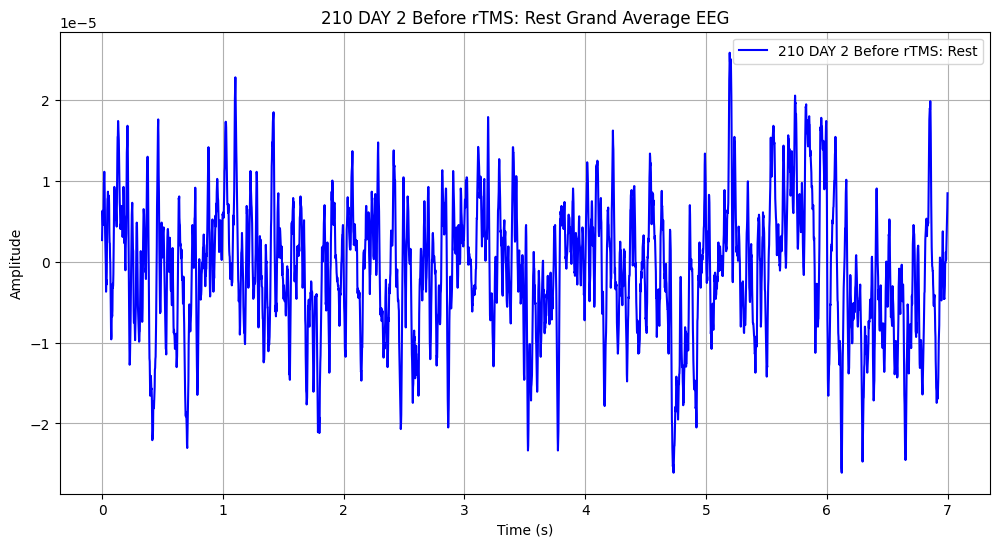

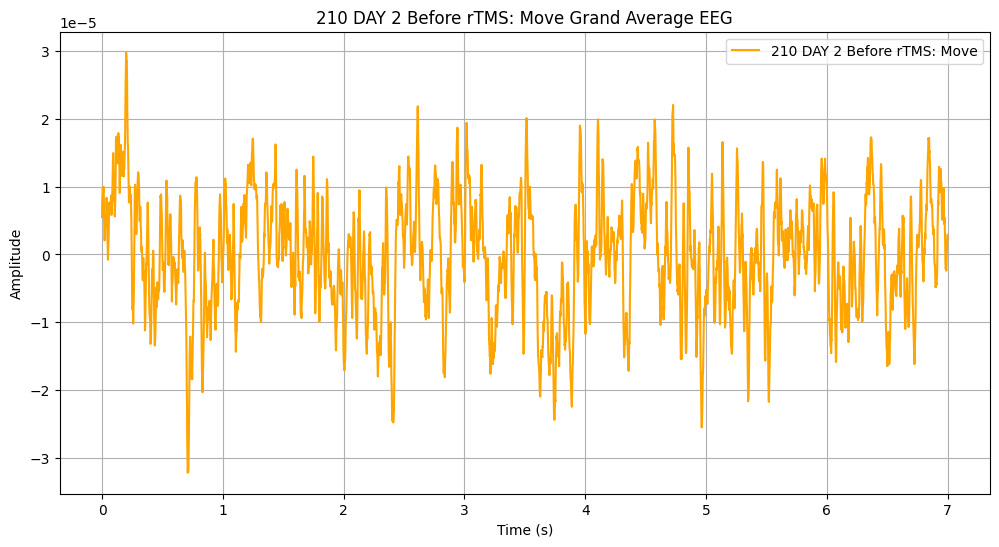

In [ ]:
mat_folder = '/content/mat_210_021'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '210 DAY 2 Before rTMS')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


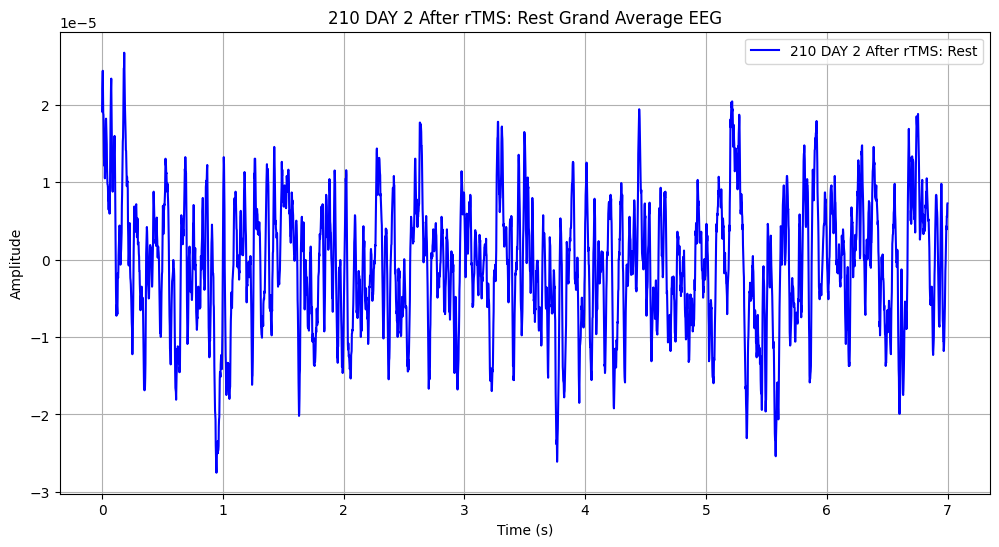

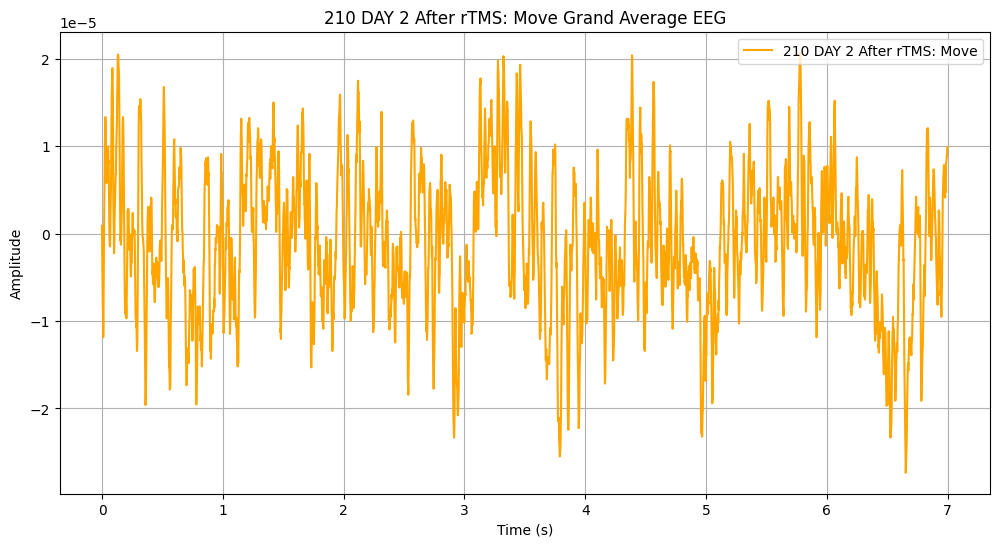

In [ ]:
mat_folder = '/content/mat_210_022'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '210 DAY 2 After rTMS')

## Grand Average -- 204

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


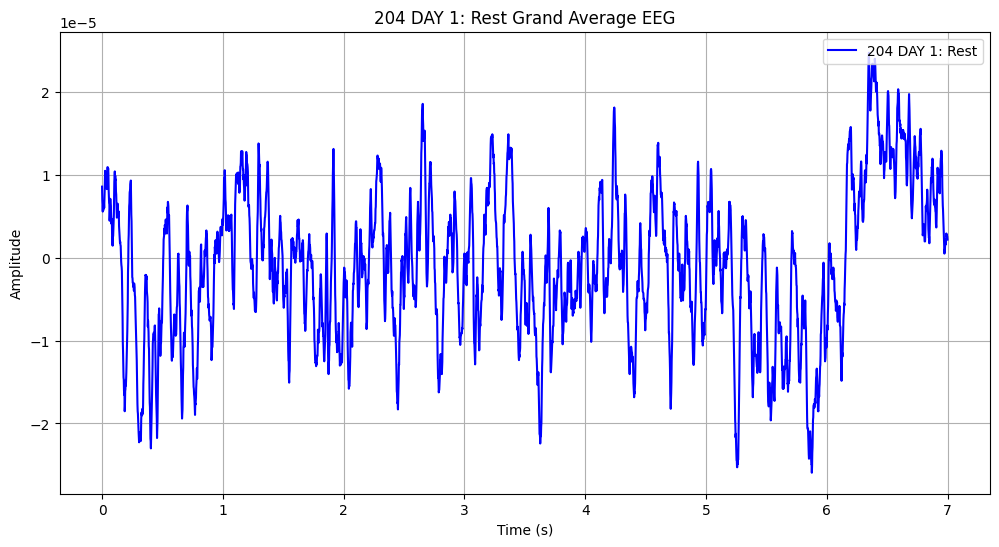

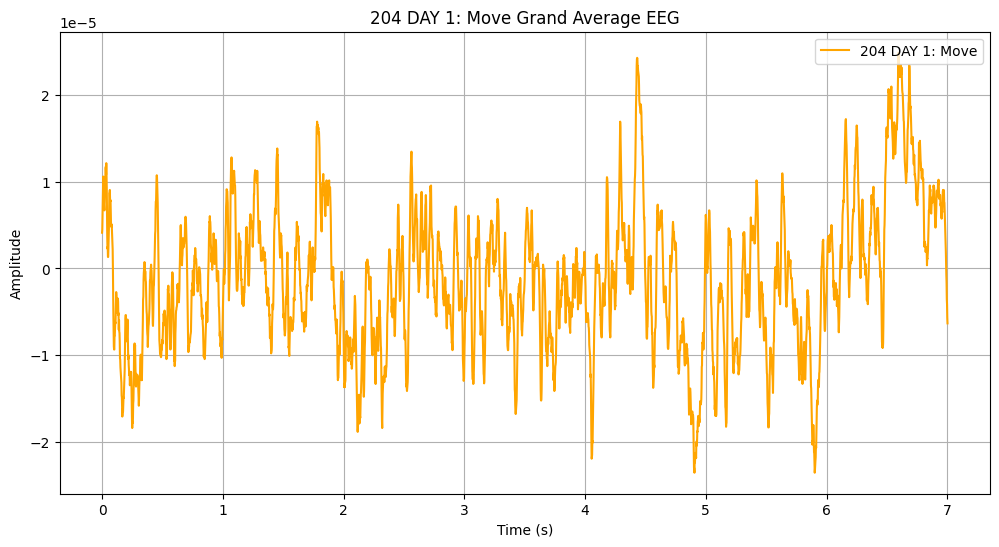

In [ ]:
mat_folder = '/content/mat_204_010'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '204 DAY 1')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


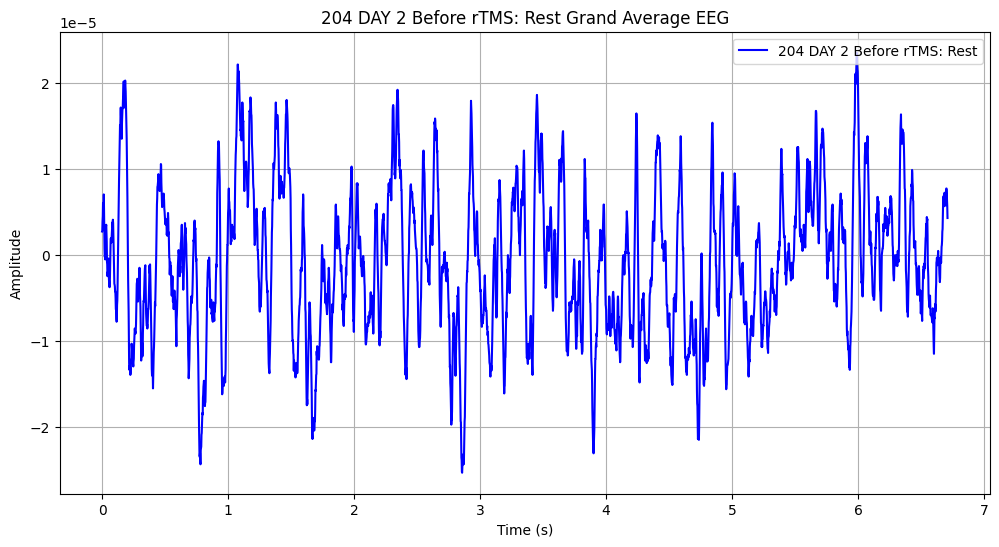

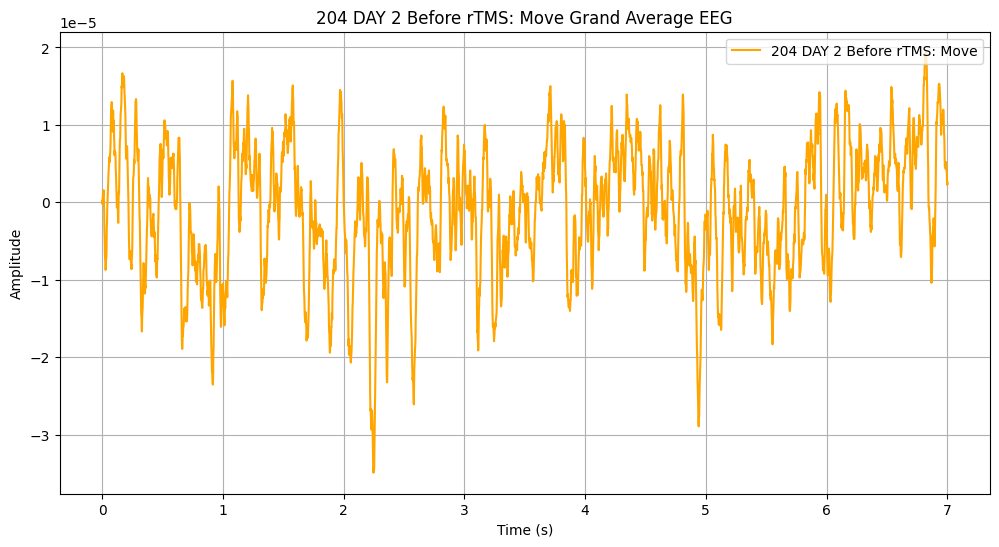

In [ ]:
mat_folder = '/content/mat_204_021'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '204 DAY 2 Before rTMS')

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-88-cc9c6784dcda>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-88-cc9c6784dcda>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


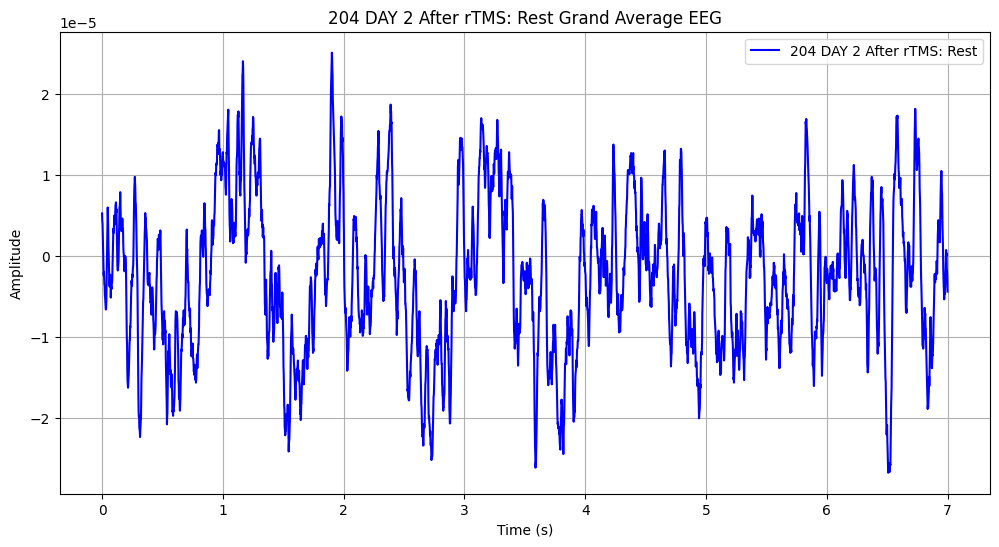

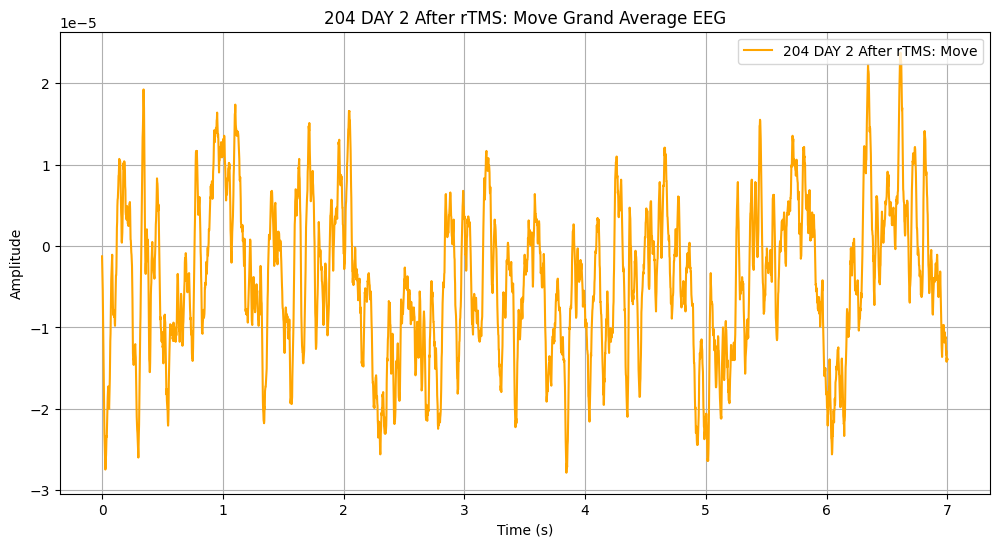

In [ ]:
mat_folder = '/content/mat_204_022'
compute_and_plot_grand_average(mat_folder, rest_starts, move_starts, rest_ends, move_ends, lowcut, highcut, amp_limit, '204 DAY 2 After rTMS')

## Utils for PSD and Integral

In [69]:
!pip install --upgrade scipy

In [71]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.signal import welch
# from scipy.integrate import simps

def compute_avg_psd(segments, fs):
    """Compute average power spectral density (PSD) for all EEG segments."""
    psd_list = []
    for seg in segments:
        nperseg = min(256, len(seg))  # Ensure nperseg does not exceed segment length
        f, psd = welch(seg, fs=fs, nperseg=nperseg)
        psd_list.append(psd)
    avg_psd = np.mean(psd_list, axis=0)
    return f, avg_psd

def compute_integral(psd_values, frequencies):
    """Compute the integral of the PSD using Simpson's rule."""
    return np.cumsum(psd_values)  # Cumulative sum for visualization

def compute_and_plot_psd_integral(mat_folder, rest_starts, move_starts, rest_ends, move_ends,
                                   lowcut, highcut, amp_limit, title):
    all_rest_segments = []
    all_move_segments = []

    for file_name in os.listdir(mat_folder):
        if file_name.endswith('.mat'):
            file_path = os.path.join(mat_folder, file_name)
            mat_data = scipy.io.loadmat(file_path)

            eeg_data = mat_data['eeg_data']
            sampling_rate = mat_data['sampling_rate'][0][0]
            event_positions = mat_data['event_positions'][0]

            eeg_data_filtered = preprocess_eeg_data(eeg_data, lowcut, highcut, sampling_rate, amp_limit)

            for start_event in event_positions:
                start_sample = int(start_event['pos'][0][0] * sampling_rate)
                if start_event['event'][0] in rest_starts:
                    for end_event in event_positions:
                        if end_event['event'][0] in rest_ends and end_event['pos'][0][0] > start_event['pos'][0][0]:
                            end_sample = int(end_event['pos'][0][0] * sampling_rate)
                            if end_sample - start_sample < 3000:
                                break
                            segment = np.mean(eeg_data_filtered[:, start_sample:end_sample], axis=0)
                            all_rest_segments.append(segment)
                            break
                elif start_event['event'][0] in move_starts:
                    for end_event in event_positions:
                        if end_event['event'][0] in move_ends and end_event['pos'][0][0] > start_event['pos'][0][0]:
                            end_sample = int(end_event['pos'][0][0] * sampling_rate)
                            if end_sample - start_sample < 3000:
                                continue
                            segment = np.mean(eeg_data_filtered[:, start_sample:end_sample], axis=0)
                            all_move_segments.append(segment)
                            break

    # 🟦 PSD Plot
    plt.figure(figsize=(12, 6))

    if all_rest_segments:
        f_rest, avg_psd_rest = compute_avg_psd(all_rest_segments, sampling_rate)
        plt.plot(f_rest, avg_psd_rest, label=title + " - PSD Rest", color='blue')
    else:
        print("No Rest segments found.")

    if all_move_segments:
        f_move, avg_psd_move = compute_avg_psd(all_move_segments, sampling_rate)
        plt.plot(f_move, avg_psd_move, label=title + " - PSD Move", color='orange')
    else:
        print("No Move segments found.")

    plt.title(f"{title} - Power Spectral Density (PSD)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (V²/Hz)")
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

    # 🔴 Integral Plot
    plt.figure(figsize=(12, 6))

    if all_rest_segments:
        cumulative_rest = compute_integral(avg_psd_rest, f_rest)
        plt.plot(f_rest, cumulative_rest, label=title + " - Integral Rest", linestyle='dashed', color='cyan')
    else:
        print("No Rest segments found.")

    if all_move_segments:
        cumulative_move = compute_integral(avg_psd_move, f_move)
        plt.plot(f_move, cumulative_move, label=title + " - Integral Move", linestyle='dashed', color='red')
    else:
        print("No Move segments found.")

    plt.title(f"{title} - Cumulative Integral of PSD")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Cumulative Power Spectral Density (V²/Hz)")
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

# Parameters
lowcut = 0.5
highcut = 45
amp_limit = 100 * 1e-6
rest_starts = ['7691']
move_starts = ['7701']
rest_ends = ['7692', '7693']
move_ends = ['7702', '7703']

## PSD and Integral -- 210

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-71-331099afa131>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-71-331099afa131>:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-71-331099afa131>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


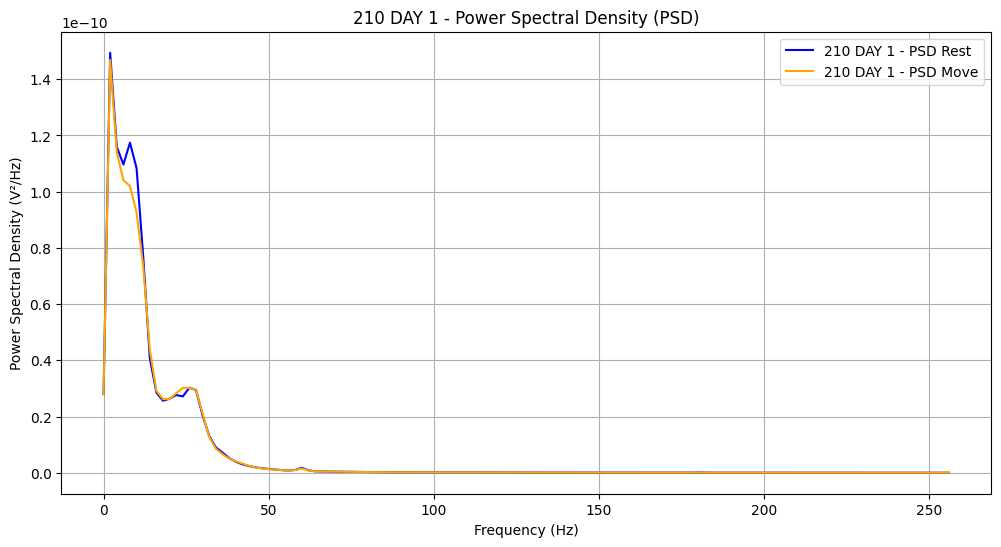

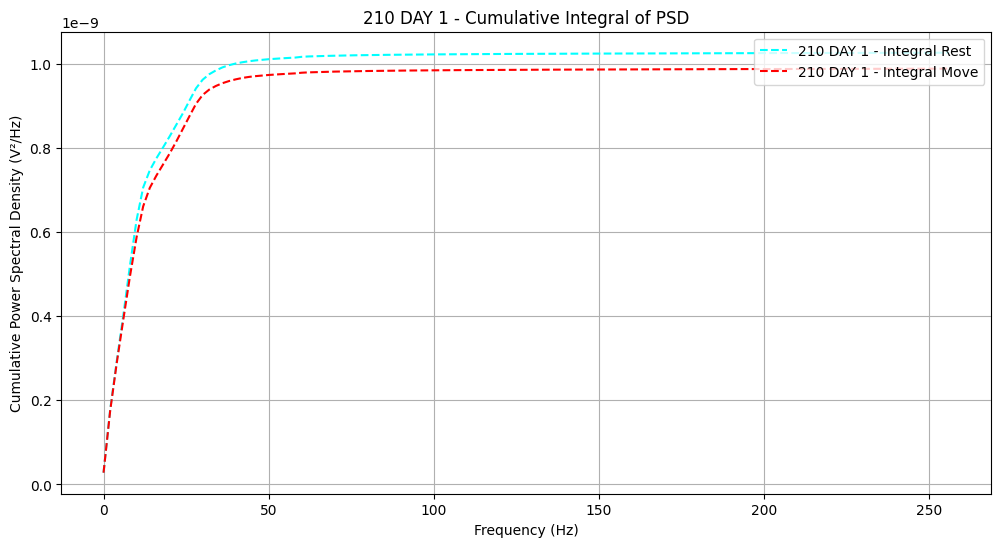

In [72]:
mat_folder = '/content/mat_210_010'
compute_and_plot_psd_integral(mat_folder, rest_starts, move_starts, rest_ends, move_ends,
                                lowcut, highcut, amp_limit, "210 DAY 1")

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-71-331099afa131>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-71-331099afa131>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-71-331099afa131>:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


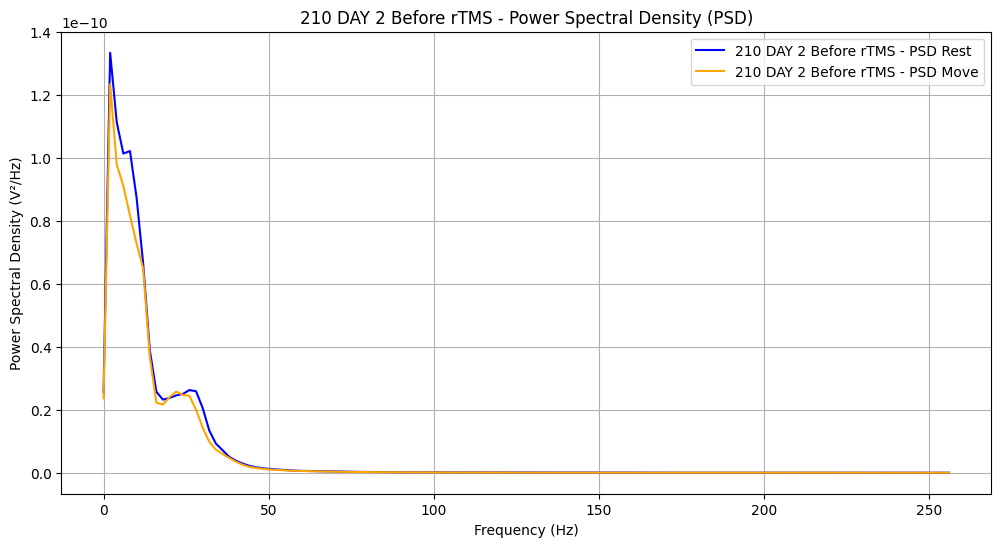

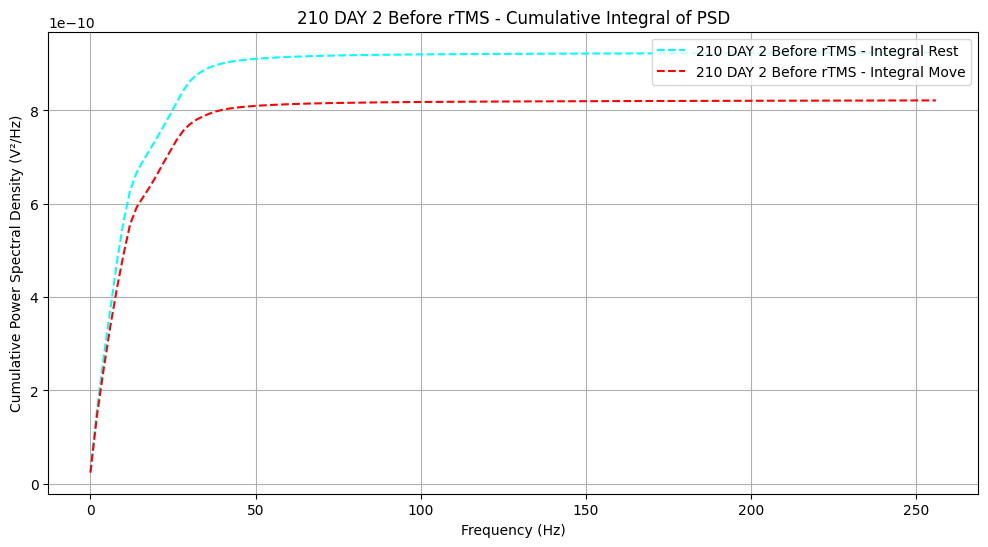

In [74]:
mat_folder = '/content/mat_210_021'
compute_and_plot_psd_integral(mat_folder, rest_starts, move_starts, rest_ends, move_ends,
                                lowcut, highcut, amp_limit, "210 DAY 2 Before rTMS")

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-71-331099afa131>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-71-331099afa131>:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-71-331099afa131>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


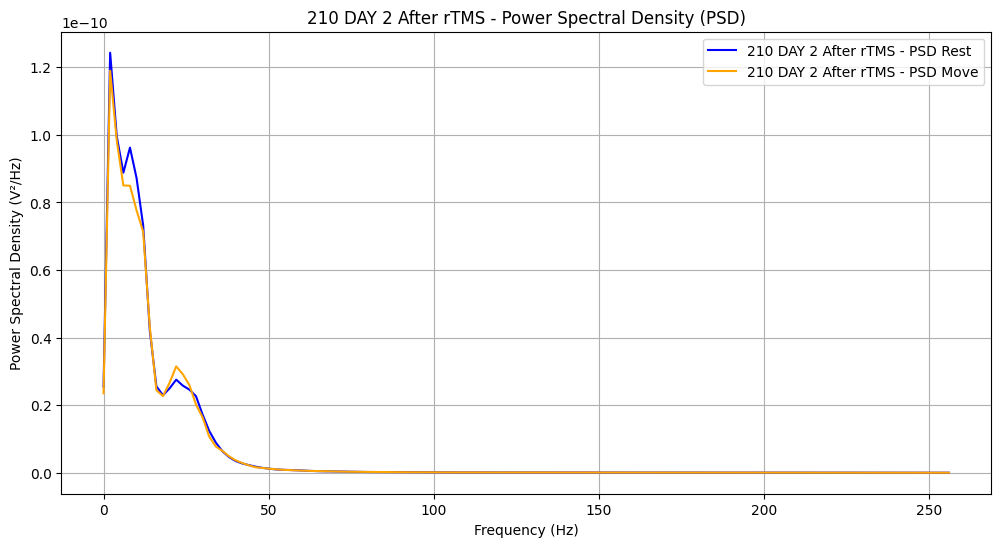

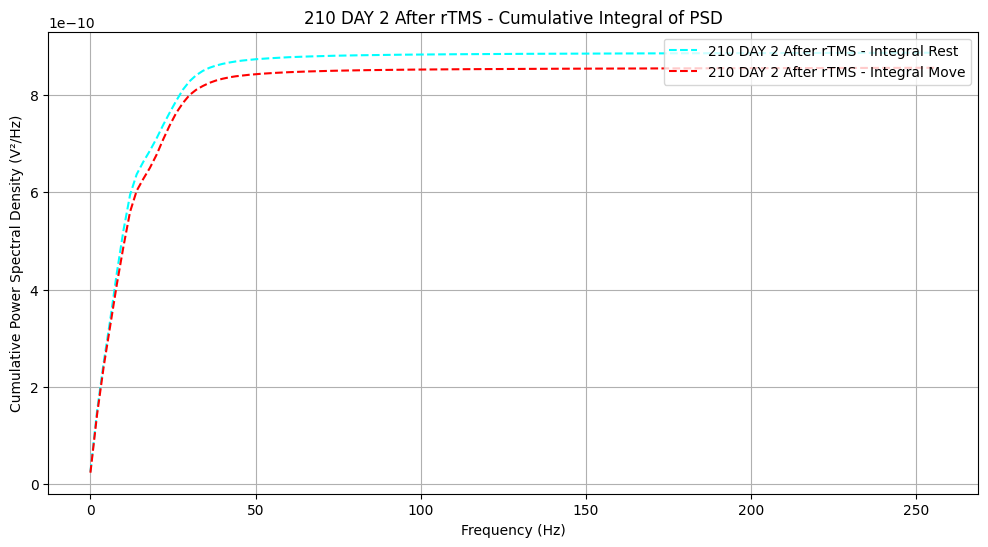

In [75]:
mat_folder = '/content/mat_210_022'
compute_and_plot_psd_integral(mat_folder, rest_starts, move_starts, rest_ends, move_ends,
                                lowcut, highcut, amp_limit, "210 DAY 2 After rTMS")

## PSD and Integral -- 204

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-71-331099afa131>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-71-331099afa131>:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-71-331099afa131>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


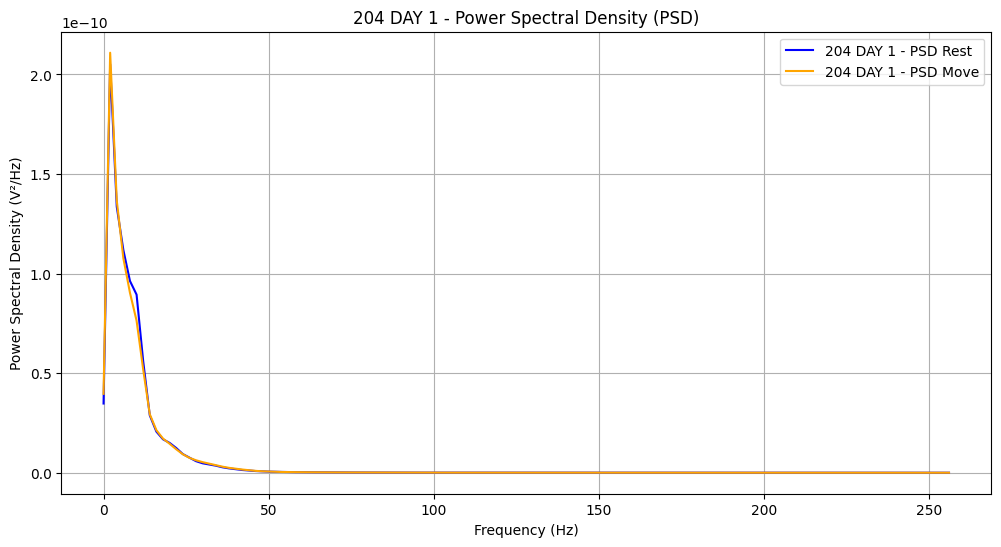

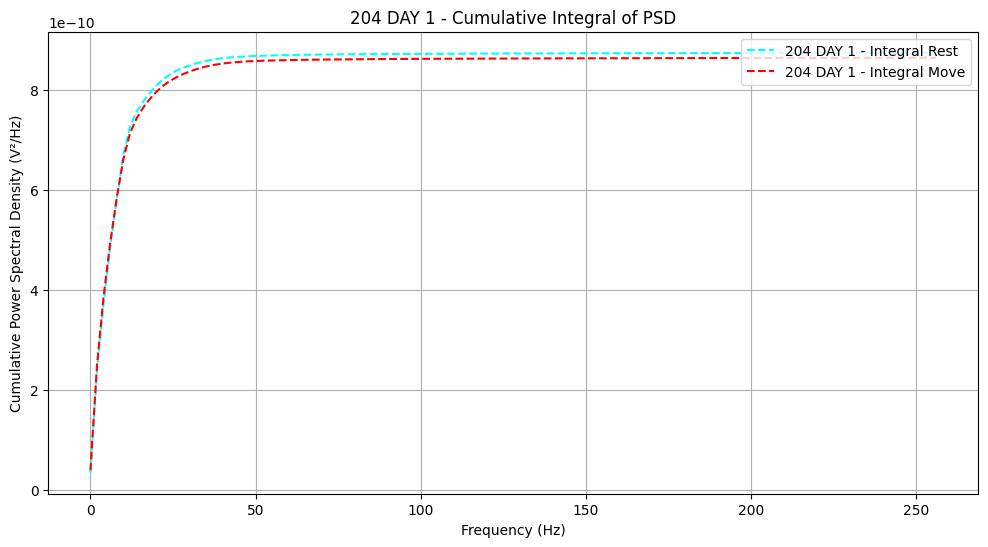

In [76]:
mat_folder = '/content/mat_204_010'
compute_and_plot_psd_integral(mat_folder, rest_starts, move_starts, rest_ends, move_ends,
                                lowcut, highcut, amp_limit, "204 DAY 1")

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-71-331099afa131>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-71-331099afa131>:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-71-331099afa131>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


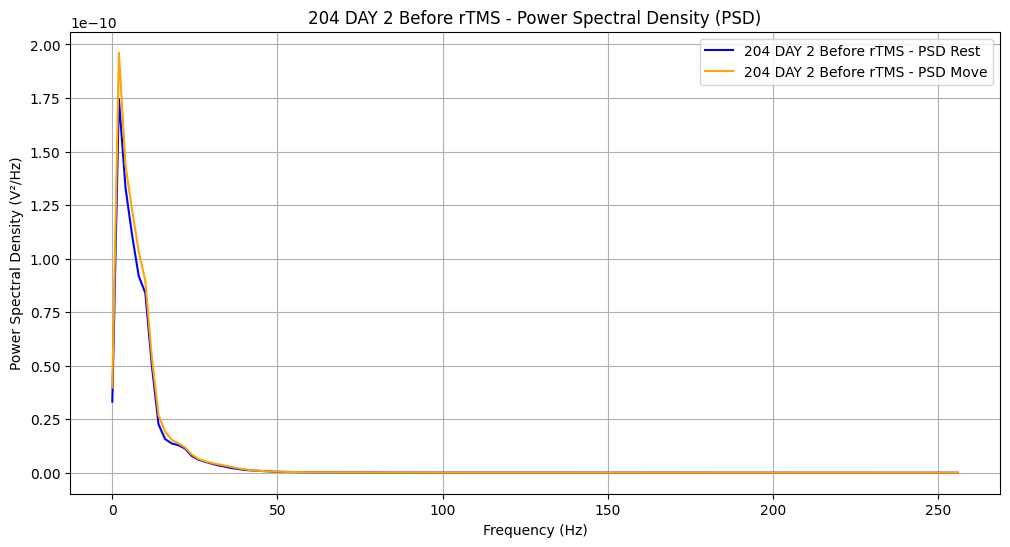

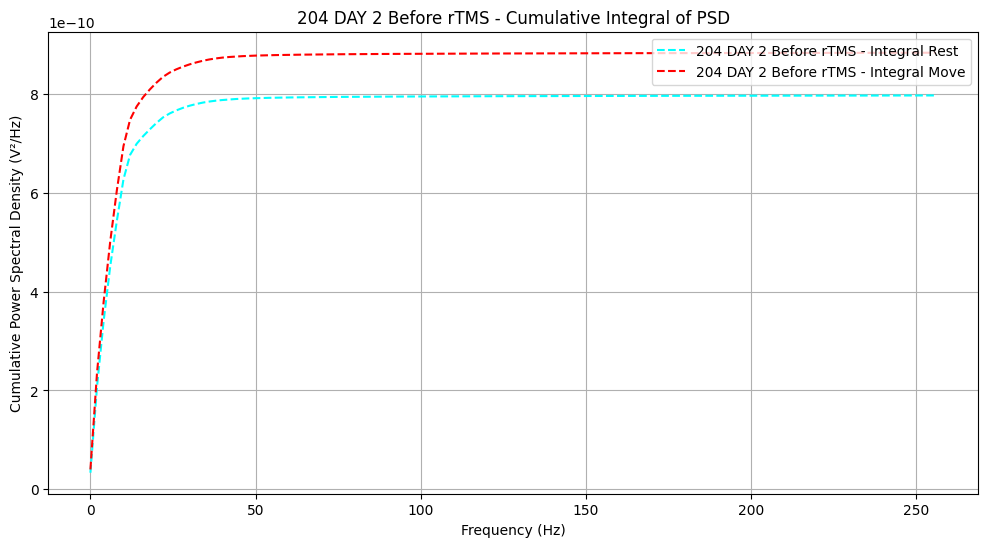

In [77]:
mat_folder = '/content/mat_204_021'
compute_and_plot_psd_integral(mat_folder, rest_starts, move_starts, rest_ends, move_ends,
                                lowcut, highcut, amp_limit, "204 DAY 2 Before rTMS")

Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


<ipython-input-71-331099afa131>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_sample = int(start_event['pos'][0][0] * sampling_rate)
<ipython-input-71-331099afa131>:52: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)
<ipython-input-71-331099afa131>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end_sample = int(end_event['pos'][0][0] * sampling_rate)


Number of channels entirely zero: 1
Indices of channels entirely zero: [67]
Number of channels entirely zero: 1
Indices of channels entirely zero: [67]


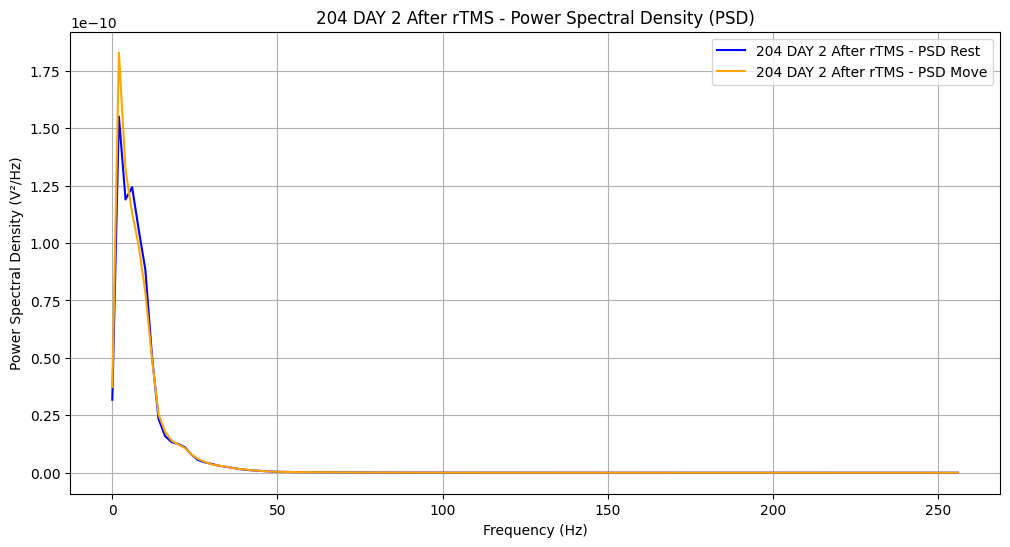

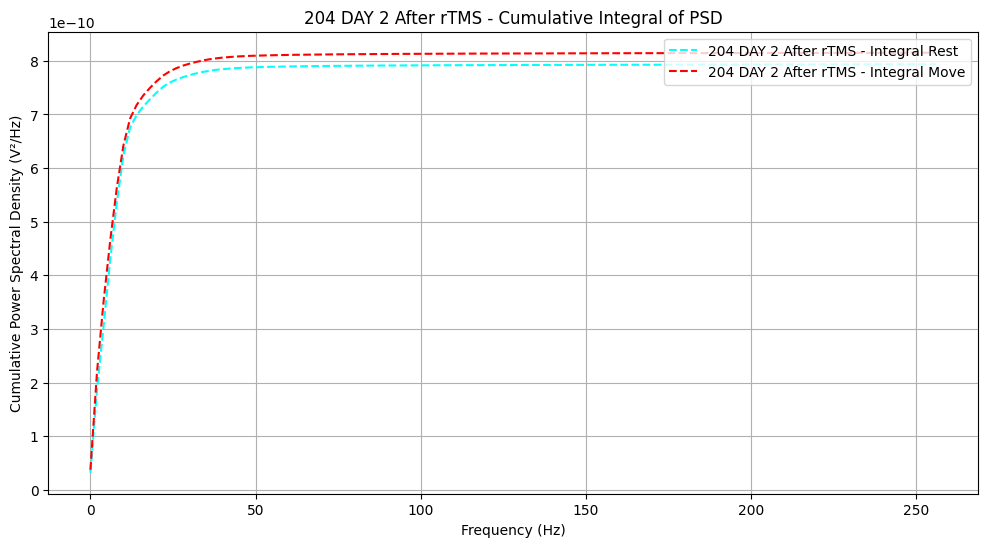

In [78]:
mat_folder = '/content/mat_204_022'
compute_and_plot_psd_integral(mat_folder, rest_starts, move_starts, rest_ends, move_ends,
                                lowcut, highcut, amp_limit, "204 DAY 2 After rTMS")